In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
plt.style.use('ggplot')

In [2]:
url = requests.get("https://www.mlssoccer.com/standings/mls/2019/")
soup = BeautifulSoup(url.text, features='html.parser')
tables = soup.find_all("tbody")
eastern = tables[0].find_all("tr")
western = tables[1].find_all("tr")

In [3]:
titles = ['Club', 'Points', 'Points Per Game', 'Games Played', 
          'Wins', 'Losses', 'Ties', 'Goals For', 
          'Goals Against', 'Goals Difference']

In [4]:
def removeAbbrev(clubName):
  if clubName in ["RBNYNew York Red Bulls","LAFCLos Angeles Football Club",]:
    return clubName[4:]
  elif clubName in ["DCD.C. United", "NENew England Revolution", "LALA Galaxy","SJSan Jose Earthquakes"]:
    return clubName[2:]
  else:
    return clubName[3:]

In [5]:
westernTeams = []
for row in western:
  cols = row.findChildren(recursive=False)
  cols = [ele.text.strip() for ele in cols[1:-4]]
  cols = [i for i in cols if i]
  cols[0] = removeAbbrev(cols[0])
  westernTeams.append(cols)
westernTeams = westernTeams[1:]

In [6]:
easternTeams = []
for row in eastern:
  cols = row.findChildren(recursive=False)
  cols = [ele.text.strip() for ele in cols[1:-4]]
  cols = [i for i in cols if i]
  cols[0] = removeAbbrev(cols[0])
  easternTeams.append(cols)
easternTeams = easternTeams[1:]

In [7]:
allTeams = easternTeams + westernTeams
df = pd.DataFrame(data=allTeams)
df.columns = titles

for col in df.columns.values[3:11]:
  df[col] = df[col].astype(int)

df['Points'] = df['Points'].astype(int)
df['Points Per Game'] = df['Points Per Game'].astype(float)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Club              24 non-null     object 
 1   Points            24 non-null     int64  
 2   Points Per Game   24 non-null     float64
 3   Games Played      24 non-null     int64  
 4   Wins              24 non-null     int64  
 5   Losses            24 non-null     int64  
 6   Ties              24 non-null     int64  
 7   Goals For         24 non-null     int64  
 8   Goals Against     24 non-null     int64  
 9   Goals Difference  24 non-null     int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 2.0+ KB


In [9]:
goals_for = df.sort_values(by='Goals For', ascending=False).head(10)

In [10]:
club_names = ['LAFC', 'NYC', 'ATL', 'COL', 'PHI', 'LA', 'TOR', 'CHI', 'DAL', 'RBNY']

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

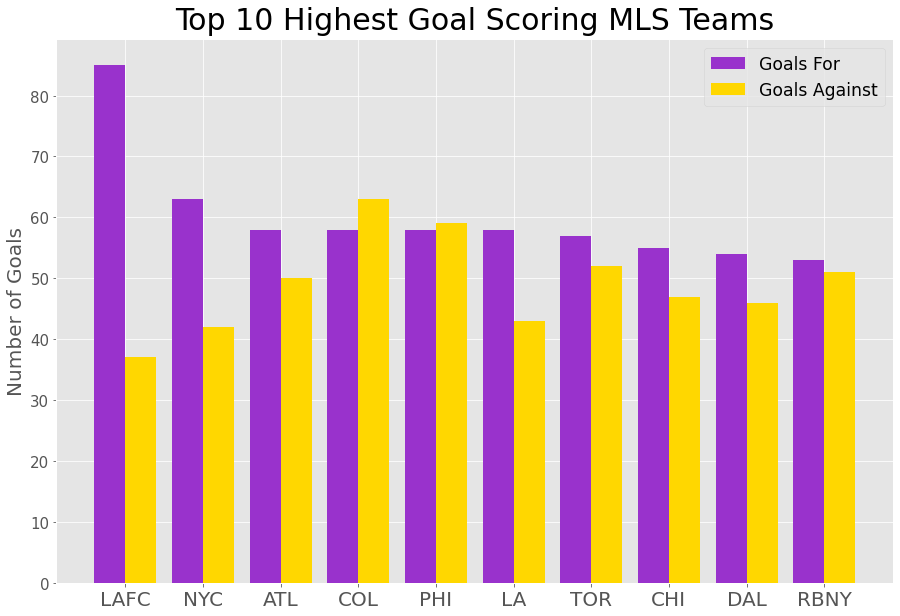

In [11]:
plt.figure(figsize=(15,10))
plt.bar(-.4+np.arange(.2,len(goals_for)),goals_for['Goals For'].values,width=.4,label='Goals For',color='darkorchid')
plt.bar(.2+np.arange(len(goals_for)), goals_for['Goals Against'].values,width=.4,label='Goals Against', color = 'gold')
plt.xticks(ticks=np.arange(len(goals_for)),labels=club_names,size=20)
plt.yticks(size=15)
plt.ylabel('Number of Goals',size=20)
plt.legend(fontsize='xx-large')
plt.title('Top 10 Highest Goal Scoring MLS Teams', size = 30, pad = 10)
plt

Choose Colorado Rapids as team since they conceded more goals than they scored. They finished outside of the playoffs finishing 9th place in the Western conference.